In [22]:
import pandas as pd
import numpy as np

# Read the CSV file
data = pd.read_csv('soil_fertility.csv')
data = data.drop(["SAMPLE_NO","SEASON","SAMPLE_DATE","FARMER_ENGLISH_NAME","VILLAGE_NAME_ENGLISH","SURVEY_NO","Unnamed: 7"], axis=1)


# Calculate normalized decision matrix
norm_data = (data - data.min()) / (data.max() - data.min())

# Calculate entropy of each attribute
h = 0.621335
entropy= -1 * (norm_data * np.log(norm_data)).sum() * h


# Calculate weight of each attribute
weight = (1 - entropy) / sum(1 - entropy)

# Print the final weights
print("Attribute Weights: \n", weight)

# Normalize the data
def normalize(df):
    return (df - np.min(df)) / (np.max(df) - np.min(df))

normalized_data = data.apply(normalize)

# Calculate the weighted normalized decision matrix
weighted_normalized_matrix = normalized_data * weight

# Calculate the best and worst values for each criterion
best_values = weighted_normalized_matrix.max()
worst_values = weighted_normalized_matrix.min()

# Calculate the VIKOR scores for each alternative
s_values = np.sqrt(np.sum((weighted_normalized_matrix - best_values) ** 2, axis=1))
r_values = np.max(np.abs(weighted_normalized_matrix - best_values), axis=1)
q_values = np.abs(np.abs(weighted_normalized_matrix - best_values).sum(axis=1) - s_values)

vikor_scores = q_values / (q_values + r_values)

# Determine the rank of each alternative based on their VIKOR scores
rank = vikor_scores.rank(ascending=False)

# Add the VIKOR scores and ranks to the original data
data['VIKOR Score'] = vikor_scores
data['Rank'] = rank

data['Quality'] = pd.cut(data["VIKOR Score"],bins=[0,0.25,0.5,0.75,1],labels=['Poor','Medium','Good','Excellent'])



print(data)
# Write the output to a new CSV file
#data.to_csv('output_file.csv', index=False)

Attribute Weights: 
 PH                   0.126729
EC                   0.031049
Organinc Carbon      0.035077
PHOSPHOROUS          0.089290
POTASH               0.255349
CALCIUM_CARBONATE    0.071593
FERROUS              0.067544
MANAGESE             0.107962
ZINK                 0.072289
COPPER               0.143118
dtype: float64
         PH    EC  Organinc Carbon  PHOSPHOROUS  POTASH  CALCIUM_CARBONATE  \
0      7.30  0.42           100.66       997.00     5.2               10.9   
1      8.60  0.44             1.08        34.90   370.0               12.0   
2      8.58  0.50             0.78        13.30   403.0                9.6   
3      8.55  0.25             0.15        16.50   504.0                6.0   
4      8.55  0.48             0.75         1.60   627.0               15.2   
...     ...   ...              ...          ...     ...                ...   
10573  4.42  0.07             0.40         1.60   224.0                1.6   
10574  4.22  0.95             0.80      

c:\Users\vedan\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


      VILLAGE_NAME_ENGLISH    PH    EC  Organinc Carbon  PHOSPHOROUS  POTASH  \
0                KURUNDWAD  7.22  0.42             0.60         12.9   400.0   
1                 ARJUNWAD  7.59  1.10             0.70         26.0   560.0   
2                 ARJUNWAD  7.58  0.42             0.60         19.0   227.0   
3                 ARJUNWAD  7.52  0.45             0.50          8.0   188.0   
4                 ARJUNWAD  7.78  0.66             0.60          5.0   248.0   
...                    ...   ...   ...              ...          ...     ...   
10573               SHIROL  7.76  0.22             0.39         63.2   470.0   
10574               SHIROL  7.20  0.28             0.36         93.8   717.0   
10575          DATTANAGAR   8.08  0.38             0.72         83.2  3750.0   
10576               SHIROL  8.08  0.30             0.87         98.5  4255.0   
10577             ARJUNWAD  8.41  0.37             0.18         17.8   711.0   

       CALCIUM_CARBONATE  FERROUS  MANA

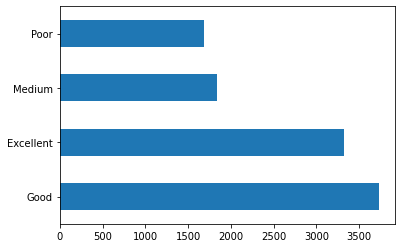

In [23]:
from matplotlib import pyplot as plt


df = pd.read_csv('soil_dataset.csv')
print(df)
df['Quality'] = pd.cut(df["Total Rating Value"],bins=[0,400,500,700,10000],labels=['Poor','Medium','Good','Excellent'])
print(df)
df['Quality'].value_counts().plot(kind='barh')
plt.show()


In [25]:
print(data['Rank'].corr(df['Total Rating Value'].rank()))

-0.012240540054970201
